# Bayesian pooled polling charts

## Set-up

In [1]:
# system imports
from pathlib import Path
from typing import Any

# analytic imports
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import pymc as pm

In [2]:
# local import
import bayes_tools
import plotting
from common import VOTING_INTENTION
from data_capture import retrieve

In [3]:
# plotting related
MODEL_DIR = "../model-images/"
Path(MODEL_DIR).mkdir(parents=True, exist_ok=True)

plt.style.use("fivethirtyeight")
SHOW = True  # show charts in the notebook
SHOW_MODEL_MAPS = True  # show model maps in notebook

## Get data

In [4]:
data = retrieve()
assert data  # check we got something

## Do the Bayesian pooling ...

In [5]:
def generate_model_map(
    model: pm.Model, filemame_tag: str, display_images: bool = SHOW_MODEL_MAPS
) -> None:
    """Generate a map image for the model."""

    gv = pm.model_to_graphviz(model)
    gv.render(
        format="png", filename=f"{MODEL_DIR}model-graphviz-{filemame_tag.replace('/', '')}"
    )
    if display_images:
        display(gv)

In [6]:
# constants for the left anchored model
ZERO_SUM = "Zero-sum"
LEFT_ANCHORED = "Left-anchored"
ELECTION_DATE = pd.Period("2022-05-21", freq="D")
last_election_result = {
    "2pp vote ALP": 52.13,
    "2pp vote L/NP": 47.87,
    "Primary vote ALP": 32.58,
    "Primary vote GRN": 12.25,
    "Primary vote L/NP": 35.69,
    "Primary vote Other": 19.48,
}

In [7]:
# identify the columns we will analyze ...
df = plotting.amalgamate_other(data[VOTING_INTENTION])
frame = ("2pp", "Primary vote")
columns = sorted([x for x in df.columns if any(item in x for item in frame)])
to_chart = ("ALP", "L/NP", "GRN", "Other")
chart = [c for c in columns if any(item in c for item in to_chart)]

APPROACH: Left-anchored
COLUMN: 2pp vote ALP


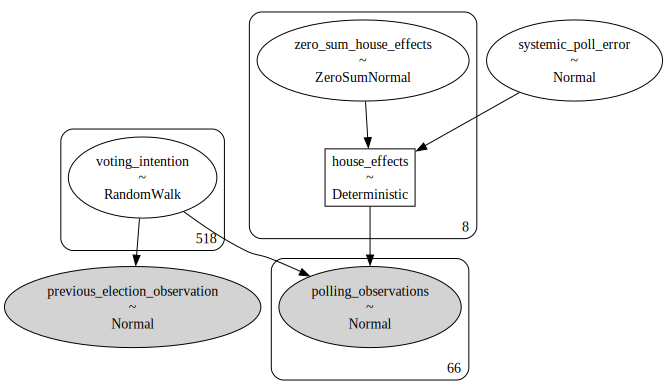

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, systemic_poll_error, zero_sum_house_effects]


Sampling 10 chains for 2_000 tune and 2_000 draw iterations (20_000 + 20_000 draws total) took 147 seconds.


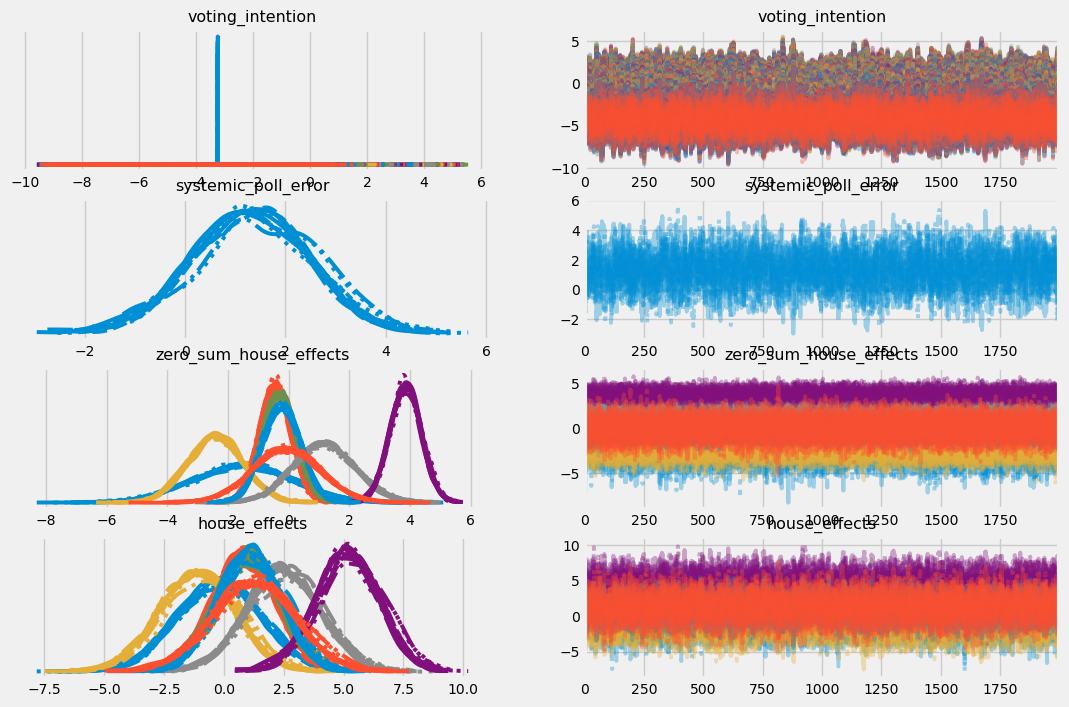

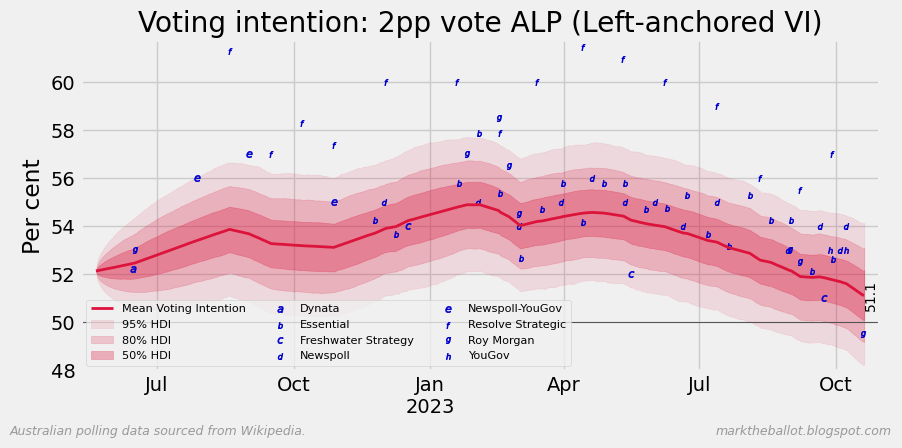

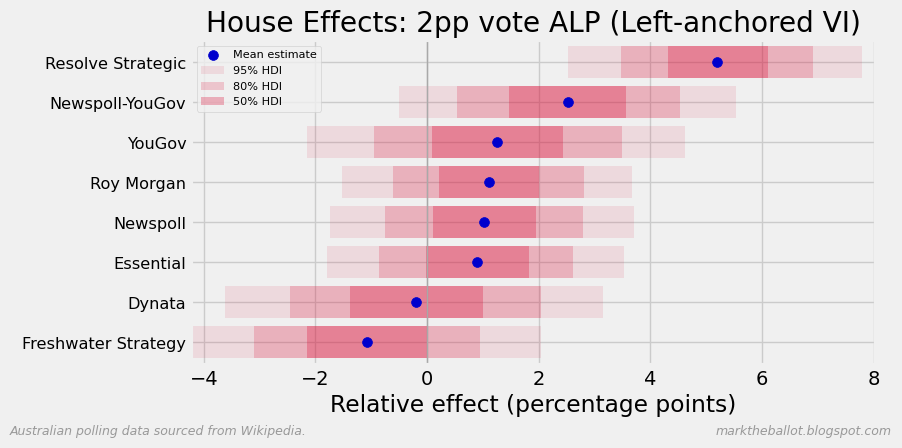

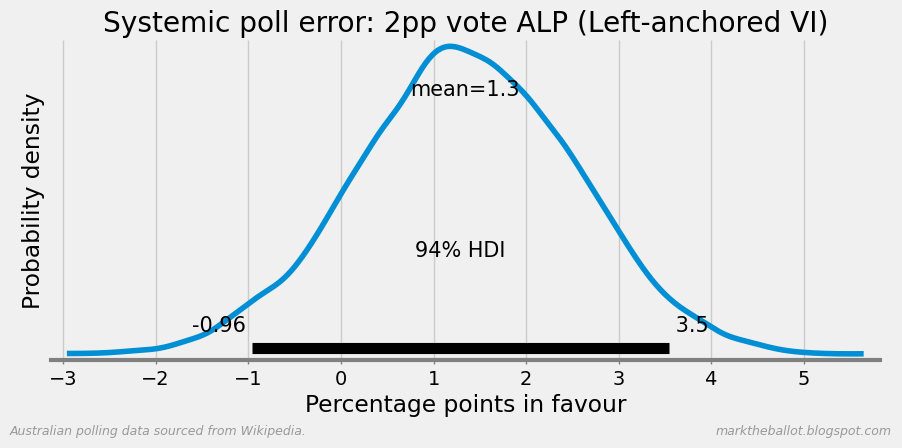

COLUMN: 2pp vote L/NP


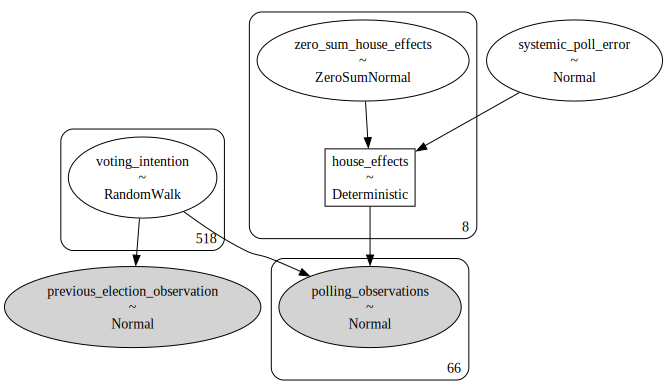

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, systemic_poll_error, zero_sum_house_effects]


Sampling 10 chains for 2_000 tune and 2_000 draw iterations (20_000 + 20_000 draws total) took 150 seconds.


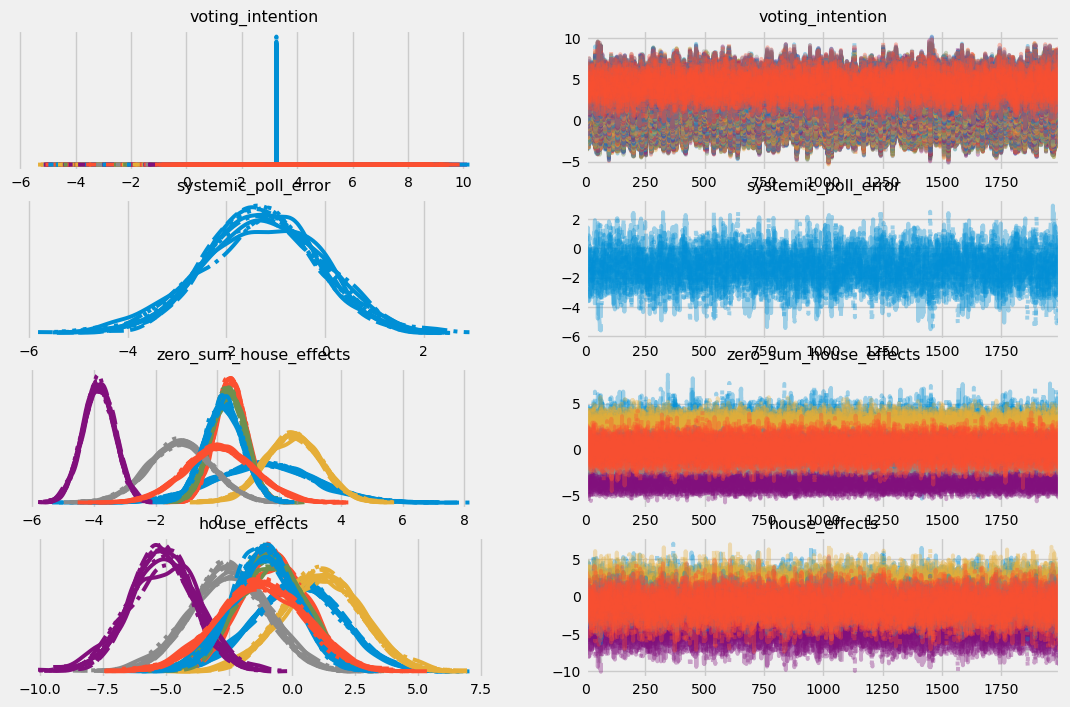

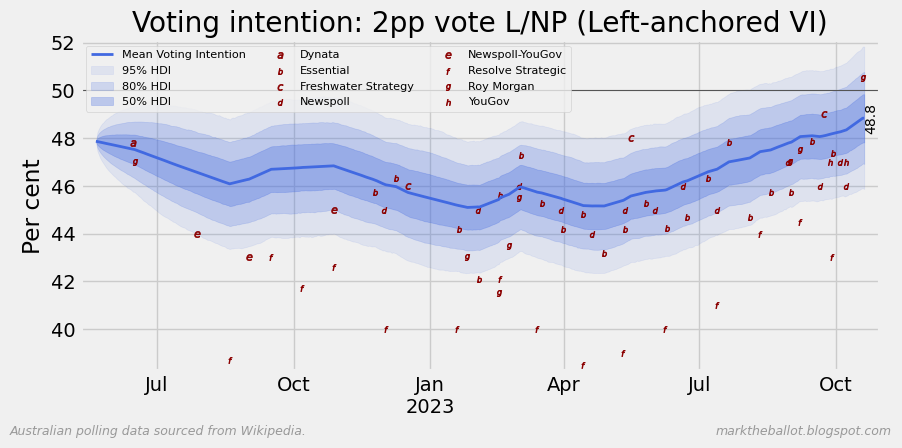

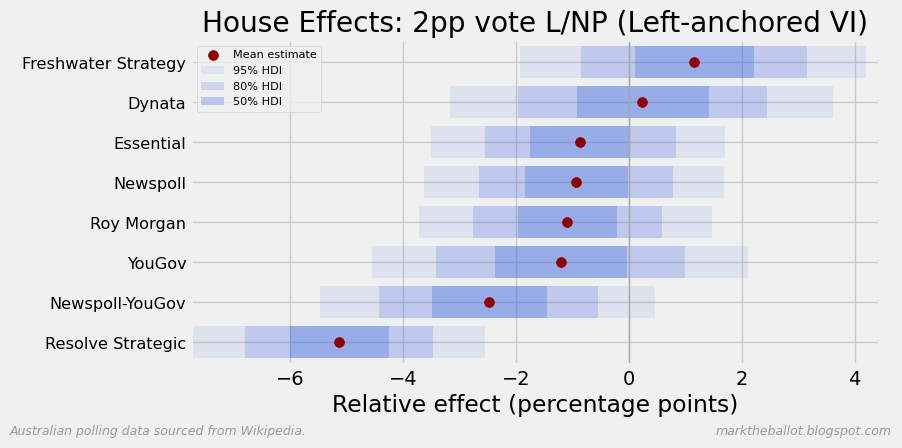

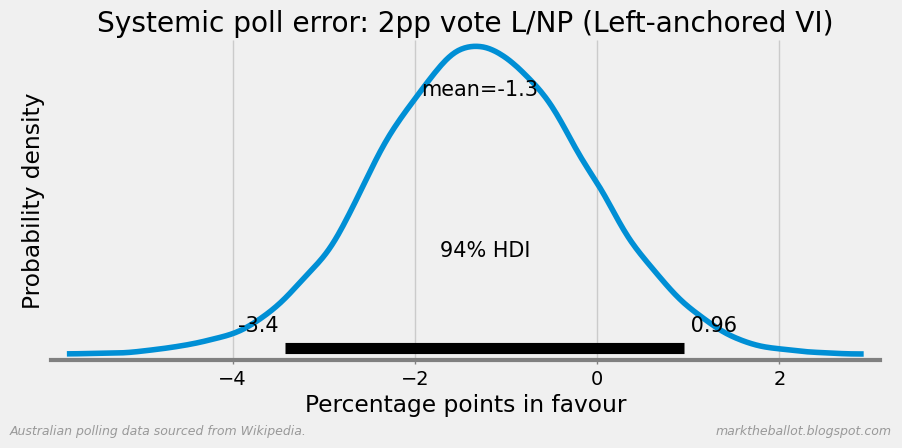

COLUMN: Primary vote ALP


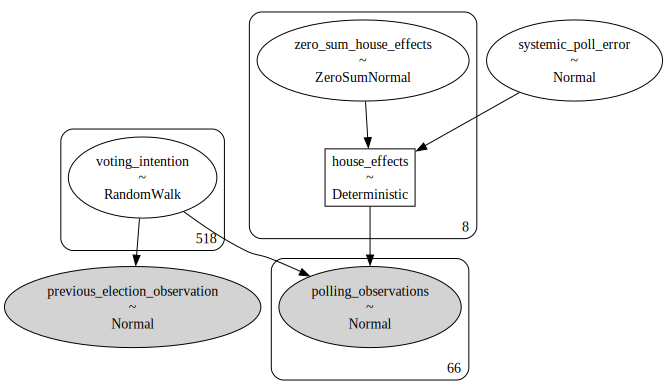

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, systemic_poll_error, zero_sum_house_effects]


Sampling 10 chains for 2_000 tune and 2_000 draw iterations (20_000 + 20_000 draws total) took 150 seconds.


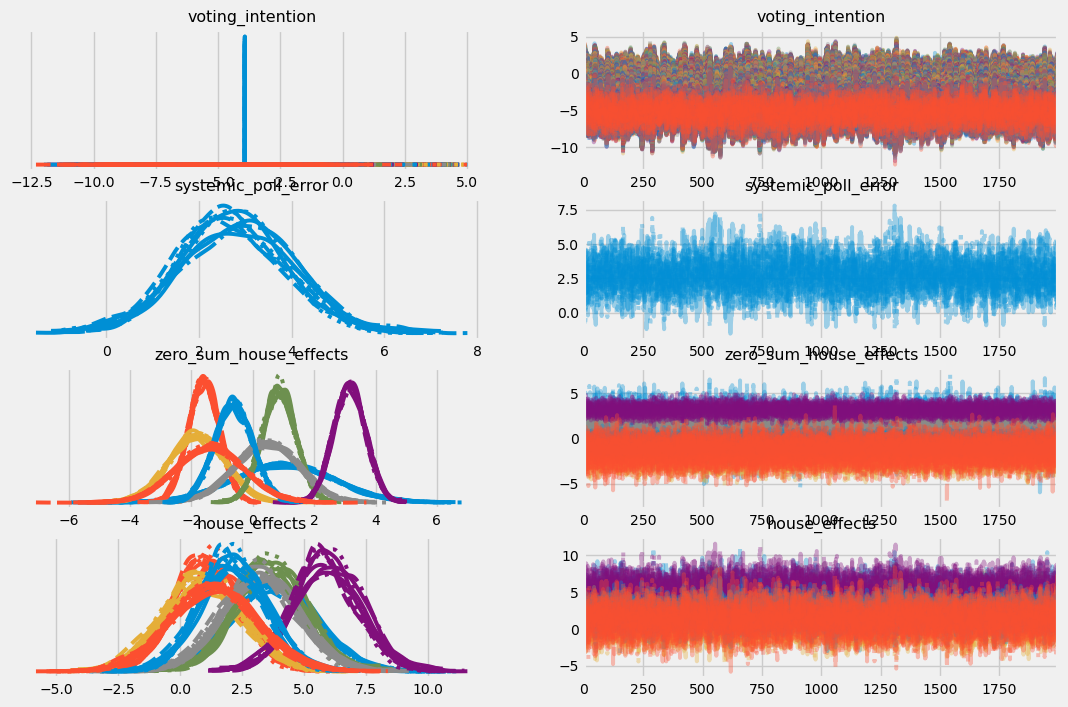

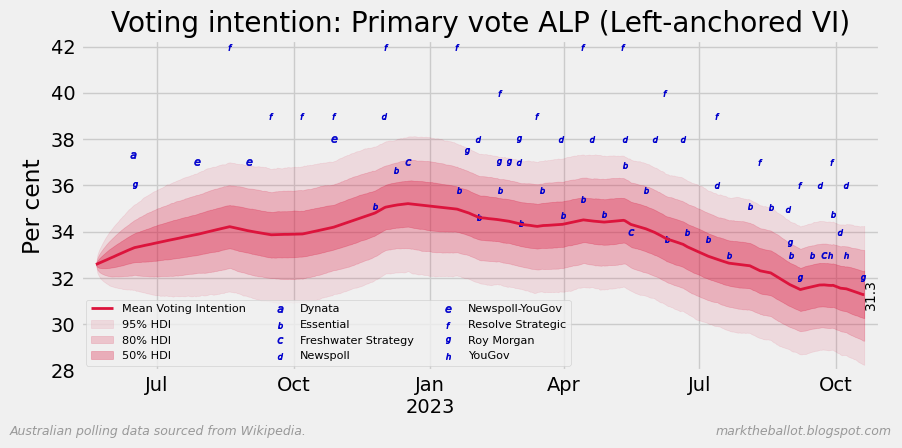

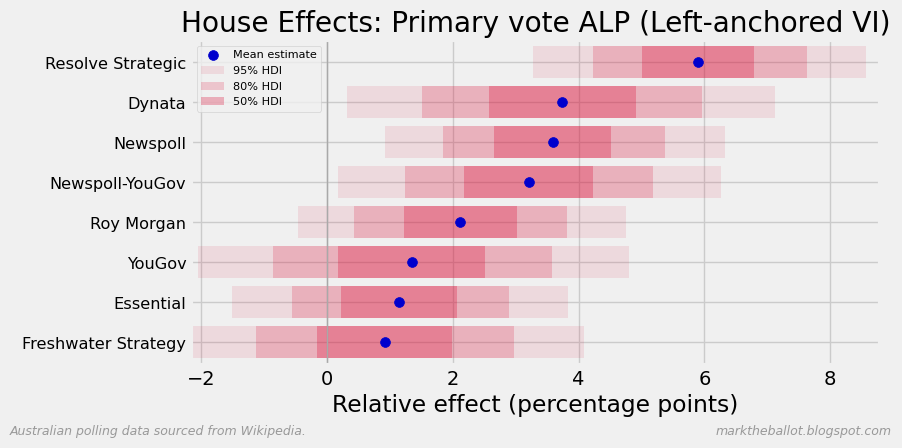

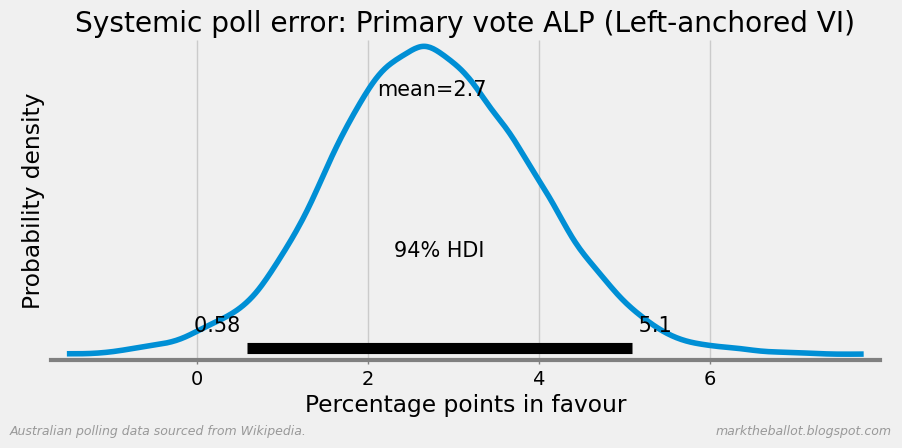

COLUMN: Primary vote GRN


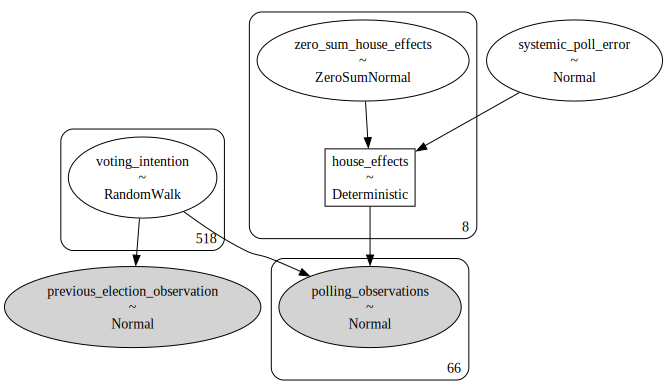

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, systemic_poll_error, zero_sum_house_effects]


Sampling 10 chains for 2_000 tune and 2_000 draw iterations (20_000 + 20_000 draws total) took 146 seconds.


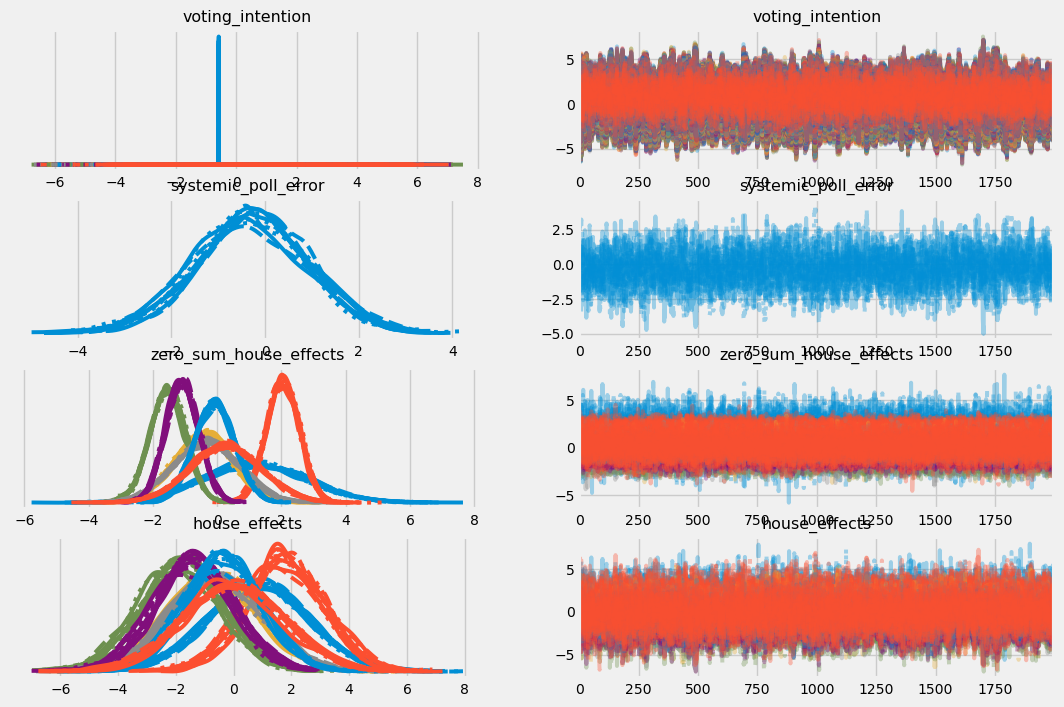

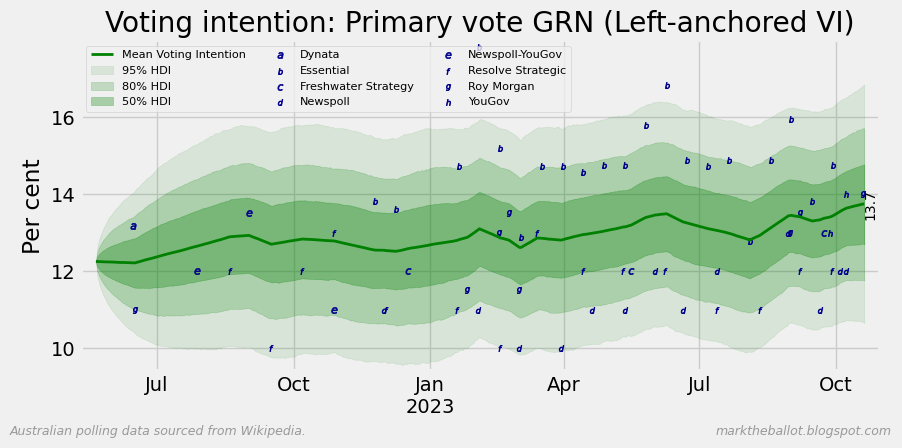

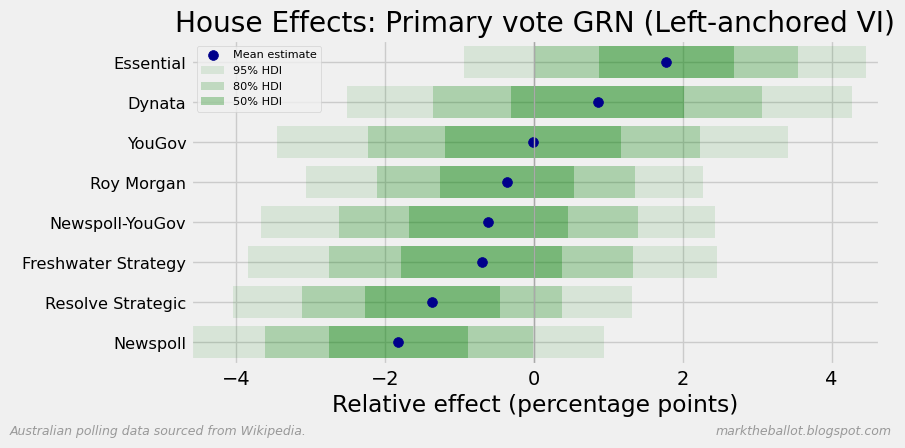

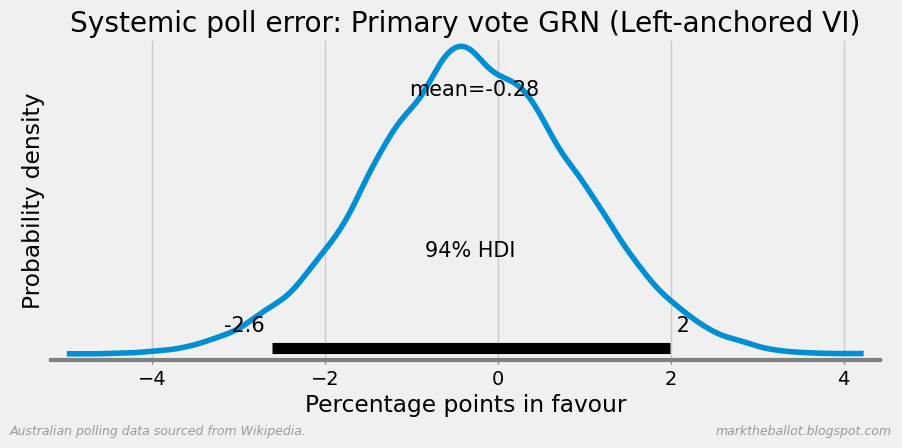

COLUMN: Primary vote L/NP


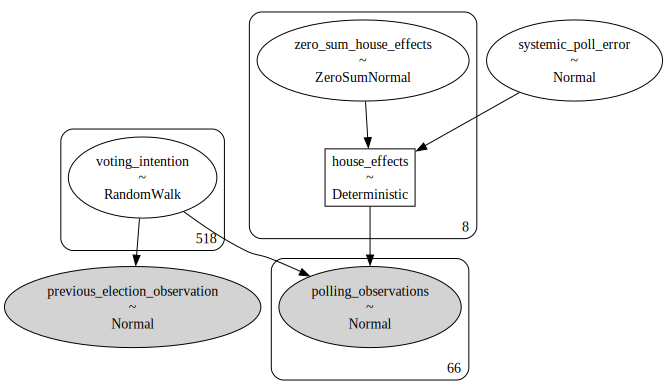

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, systemic_poll_error, zero_sum_house_effects]


Sampling 10 chains for 2_000 tune and 2_000 draw iterations (20_000 + 20_000 draws total) took 144 seconds.


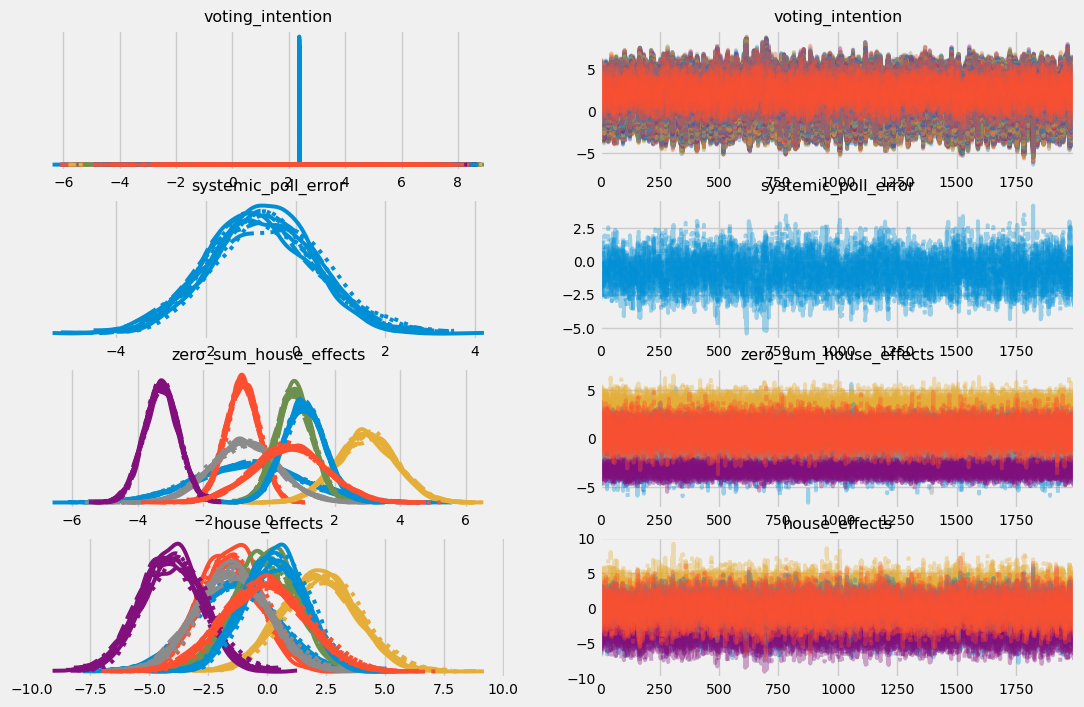

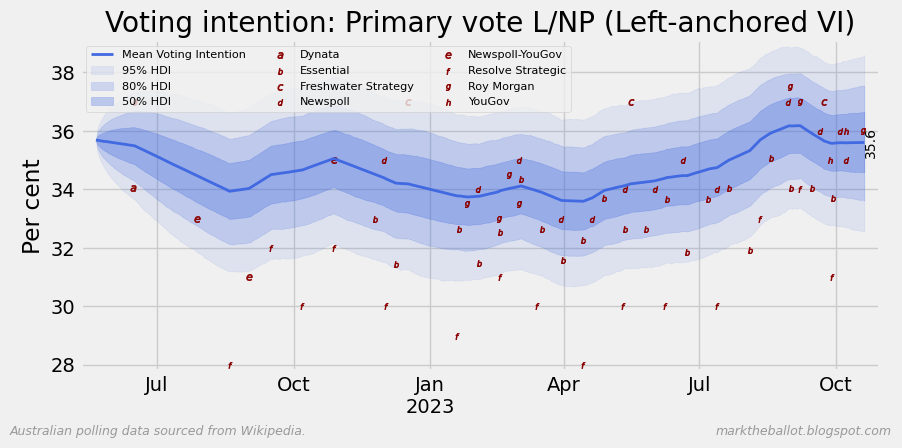

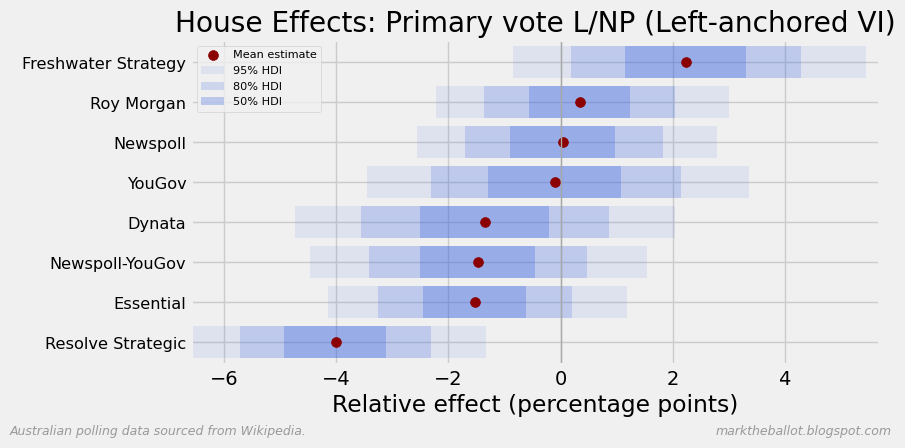

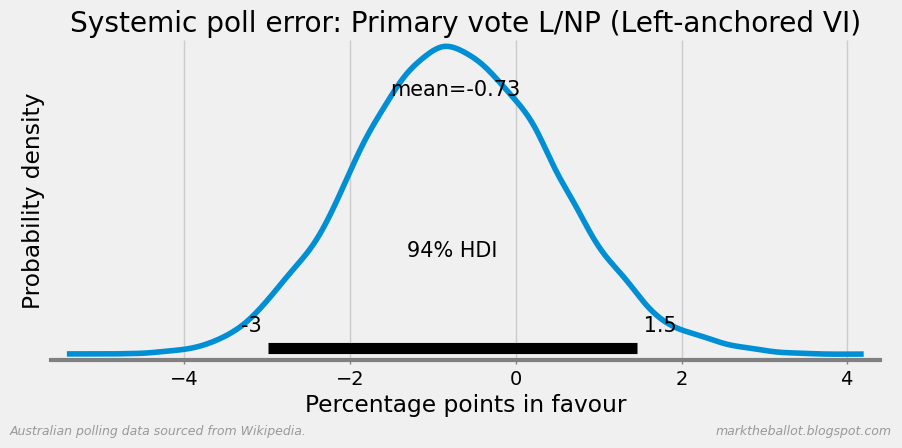

COLUMN: Primary vote Other


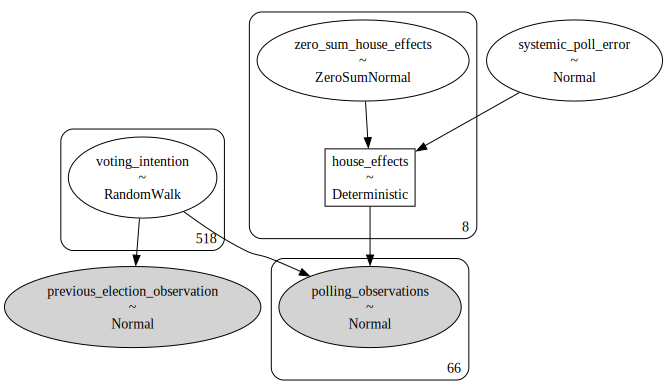

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, systemic_poll_error, zero_sum_house_effects]


Sampling 10 chains for 2_000 tune and 2_000 draw iterations (20_000 + 20_000 draws total) took 147 seconds.


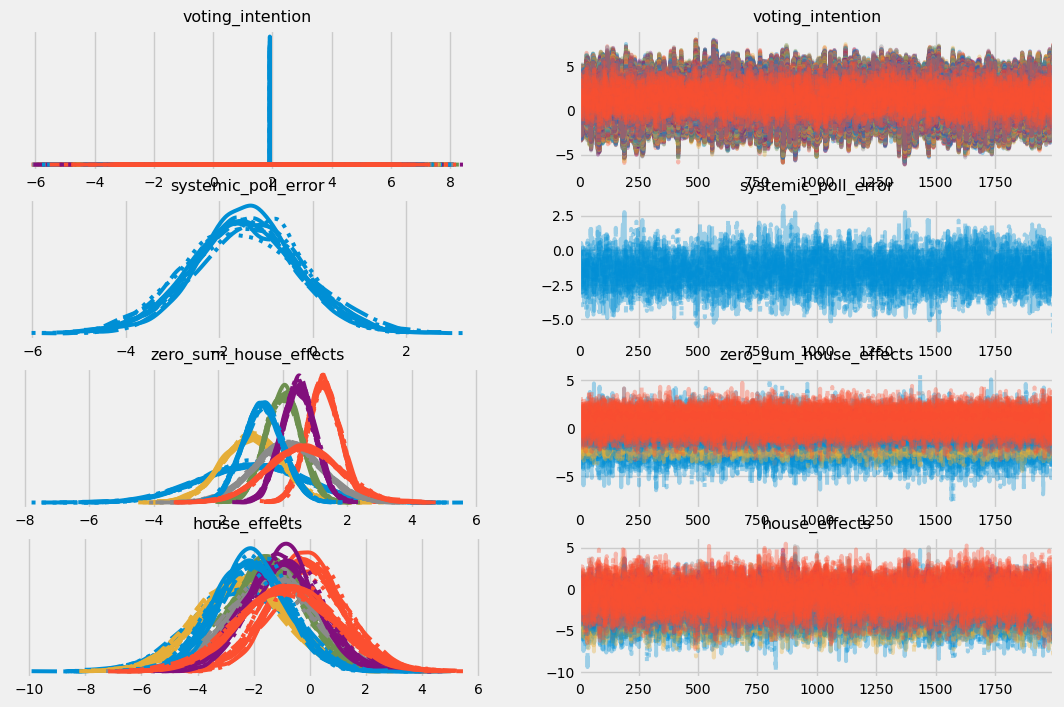

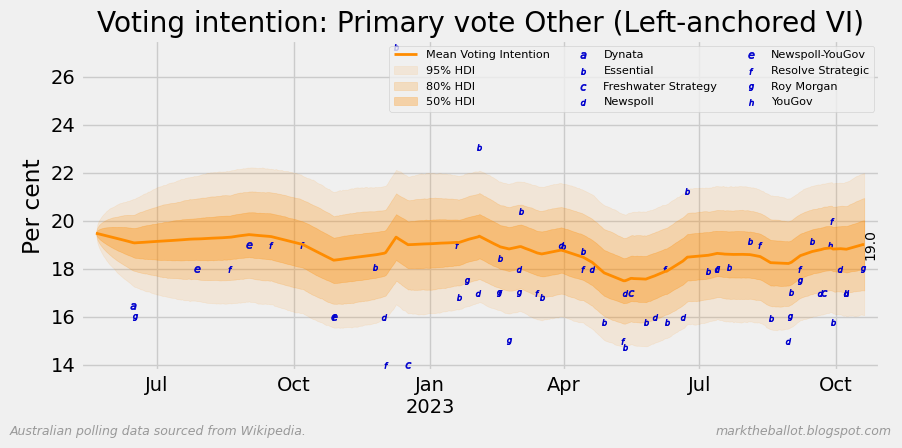

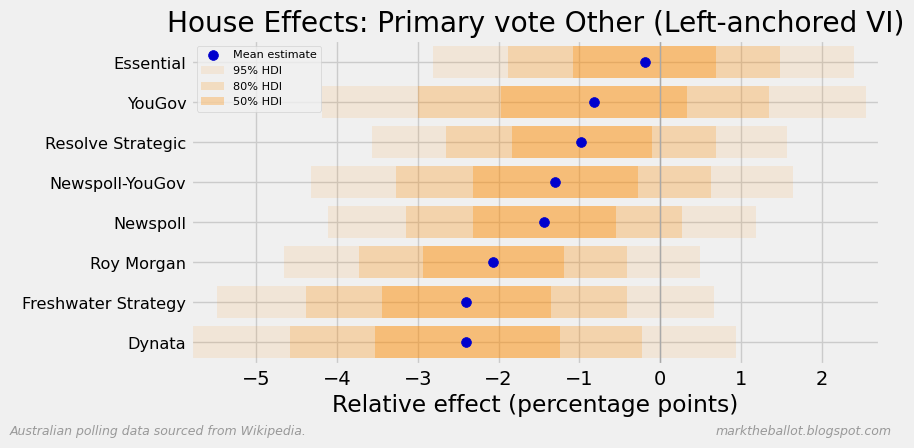

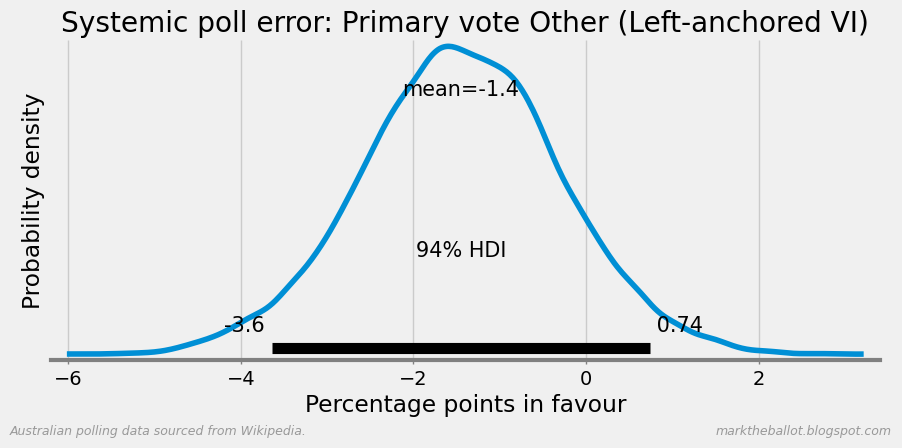

APPROACH: Zero-sum
COLUMN: 2pp vote ALP


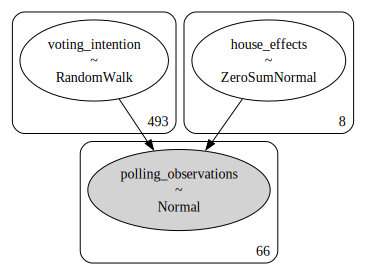

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 49 seconds.


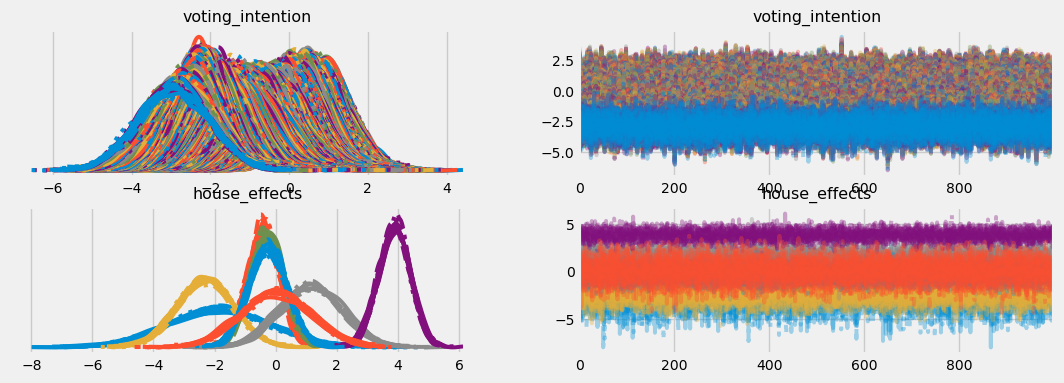

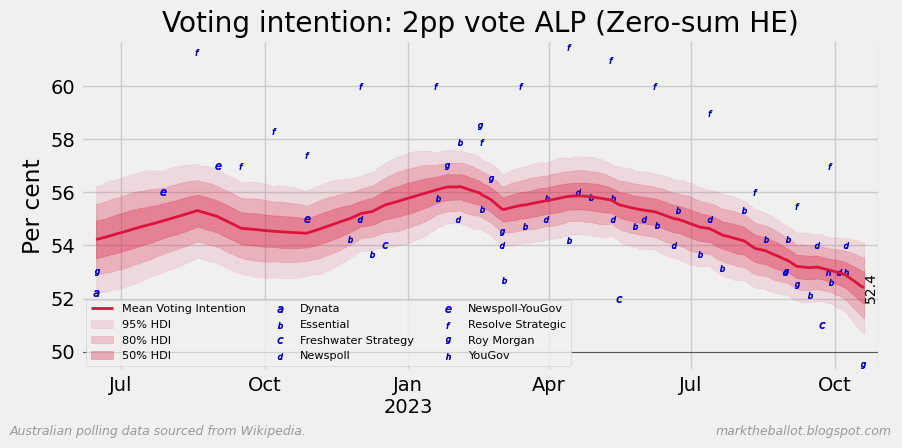

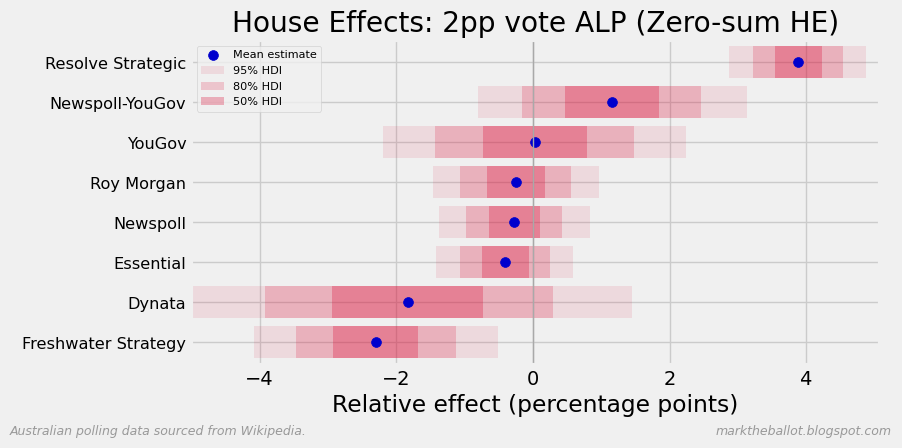

COLUMN: 2pp vote L/NP


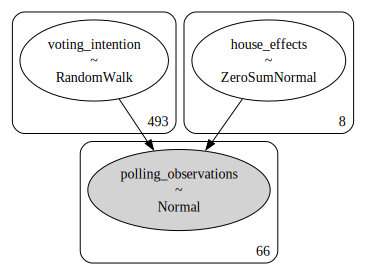

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 48 seconds.


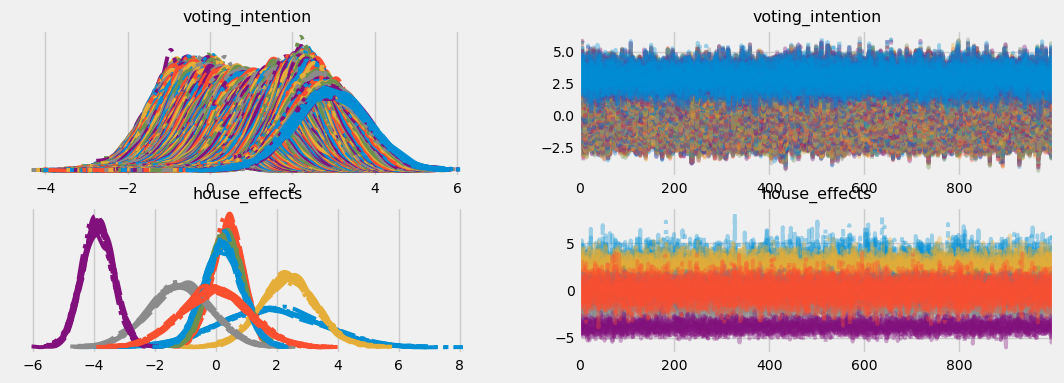

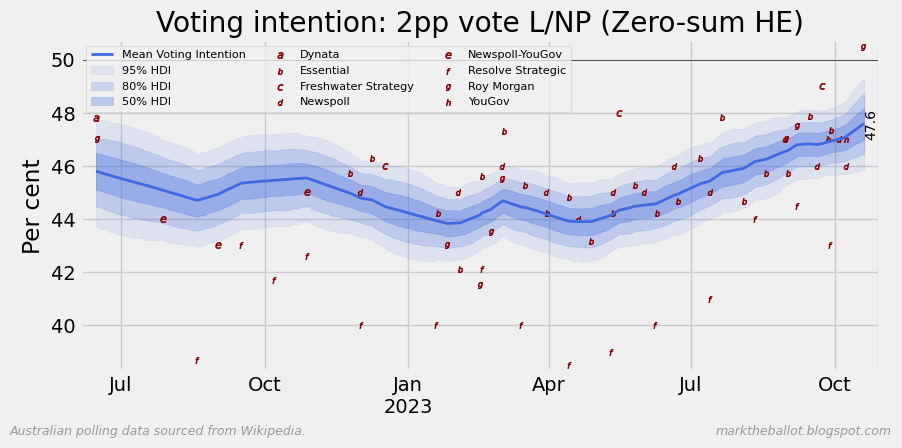

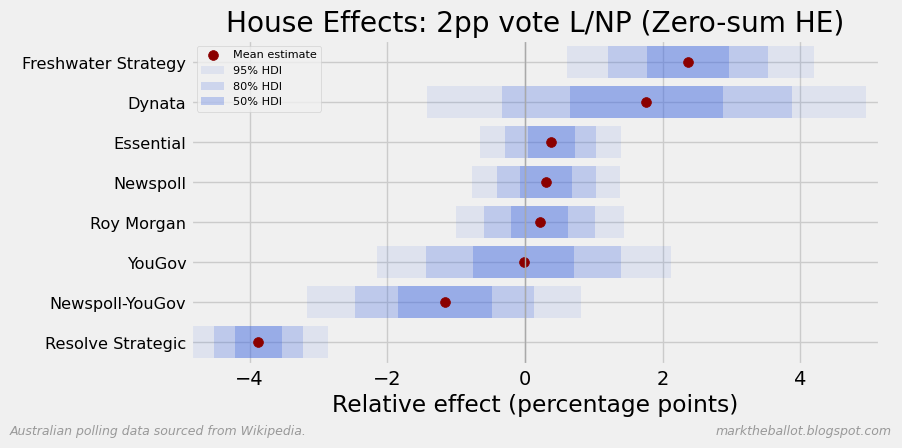

COLUMN: Primary vote ALP


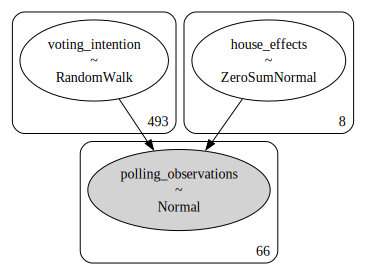

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 49 seconds.


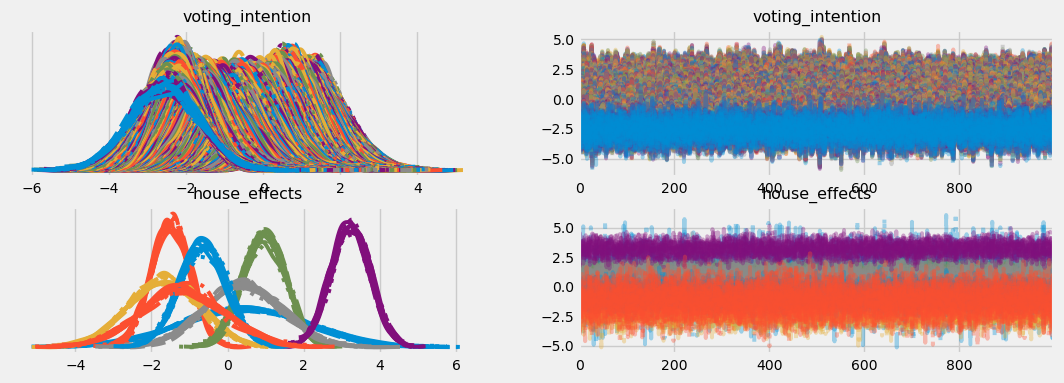

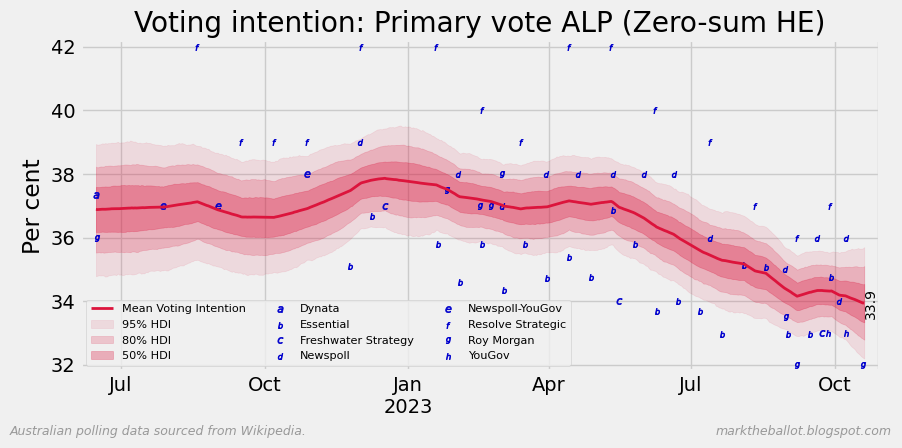

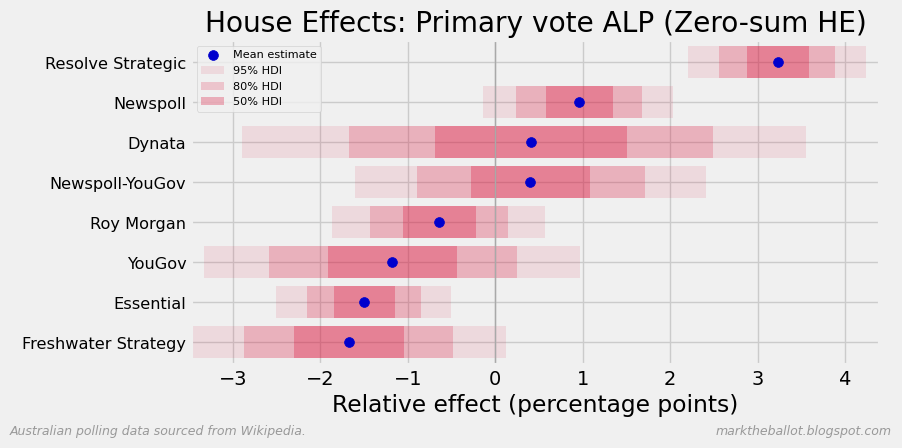

COLUMN: Primary vote GRN


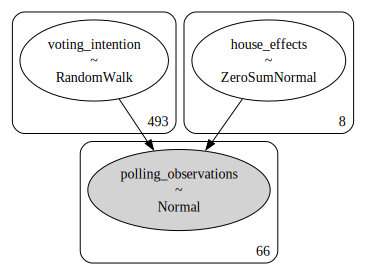

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 48 seconds.


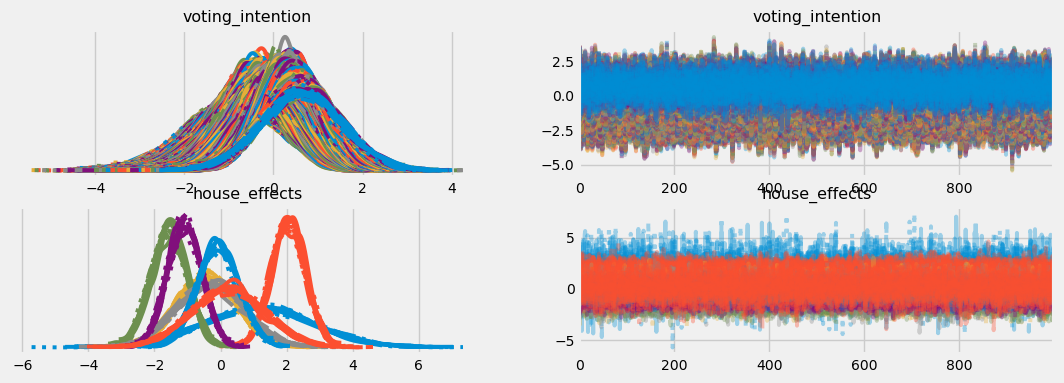

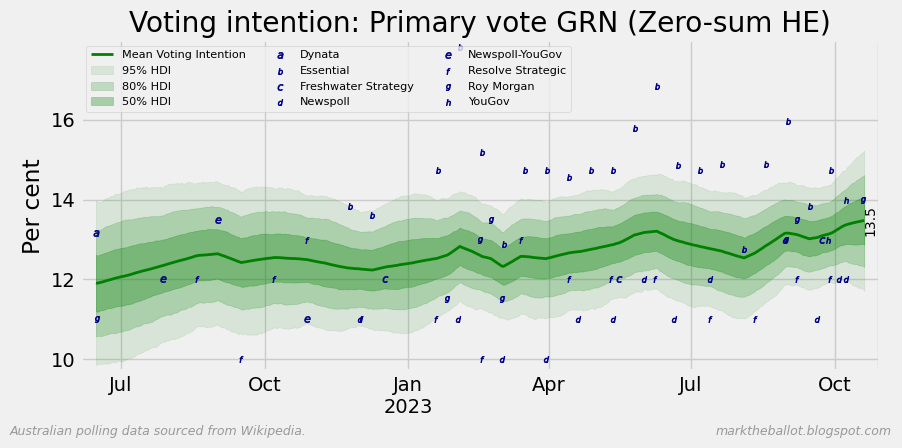

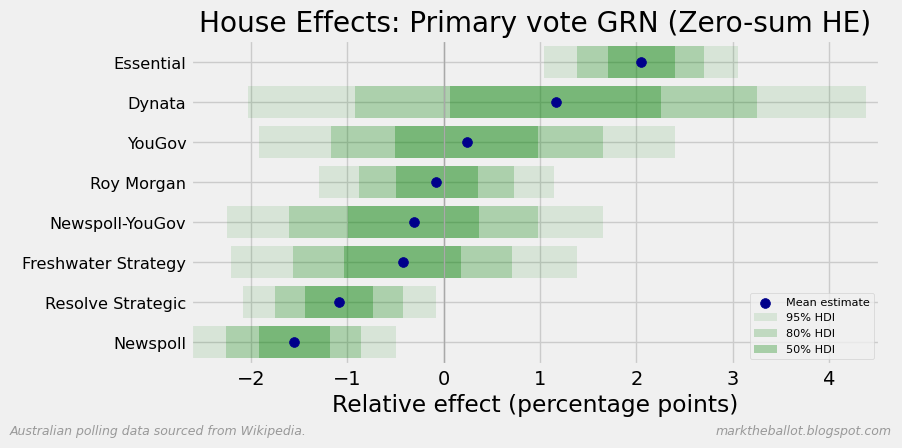

COLUMN: Primary vote L/NP


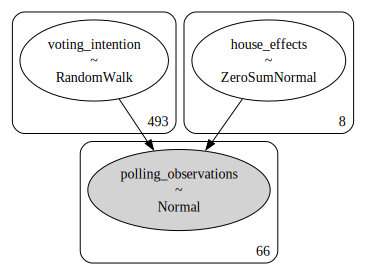

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 47 seconds.


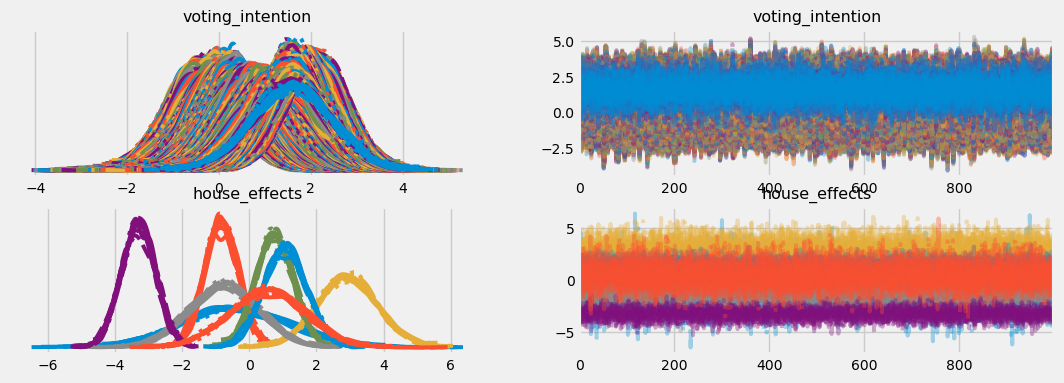

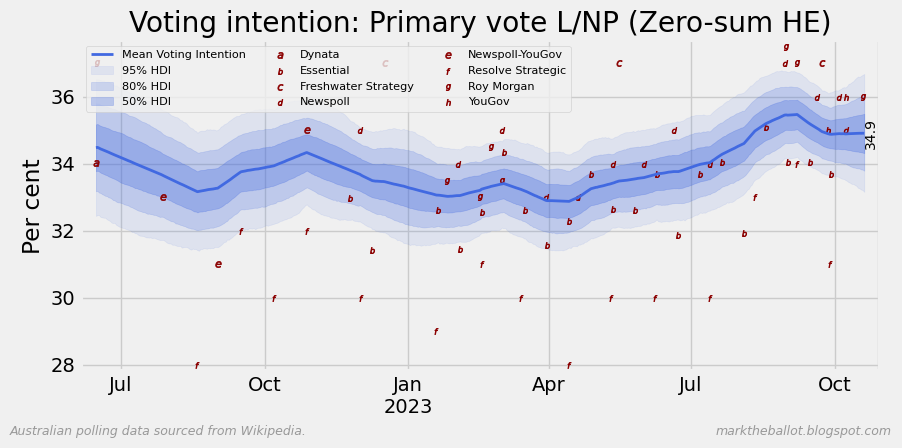

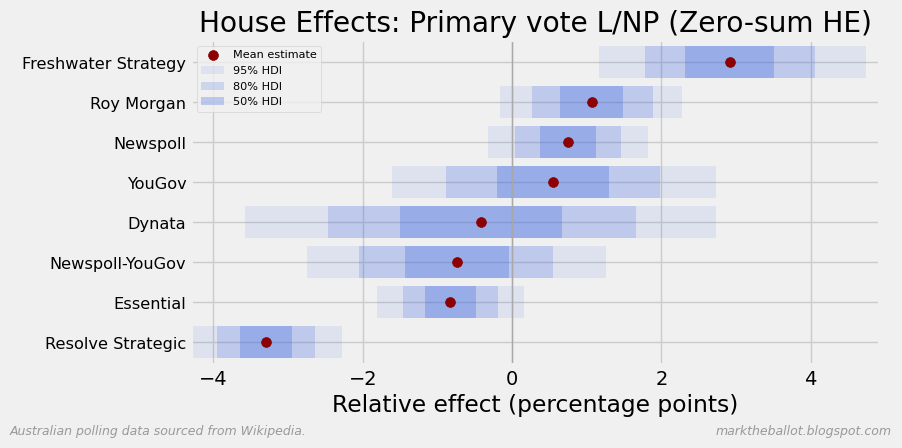

COLUMN: Primary vote Other


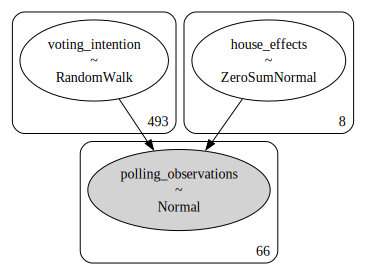

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 48 seconds.


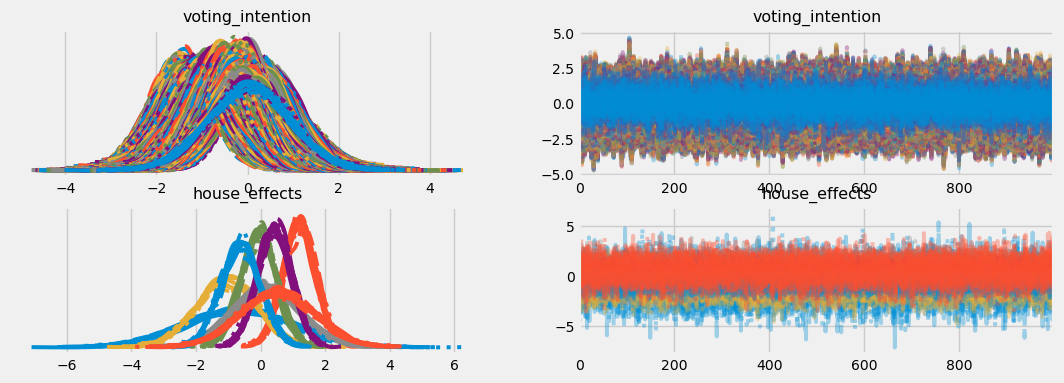

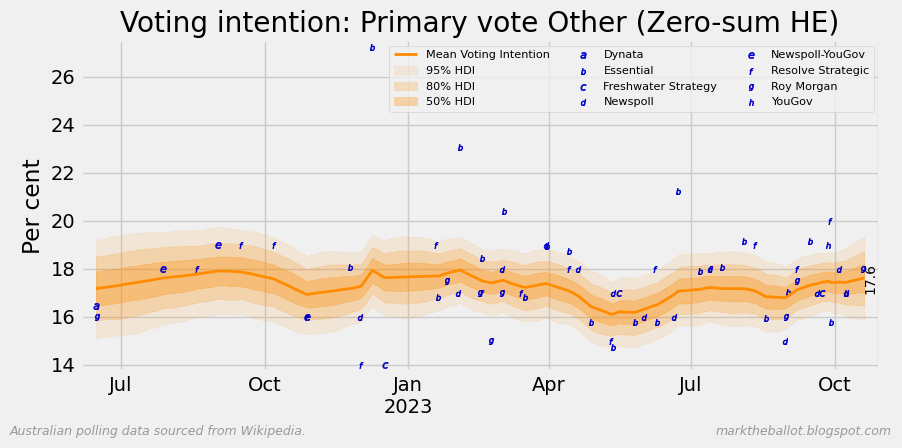

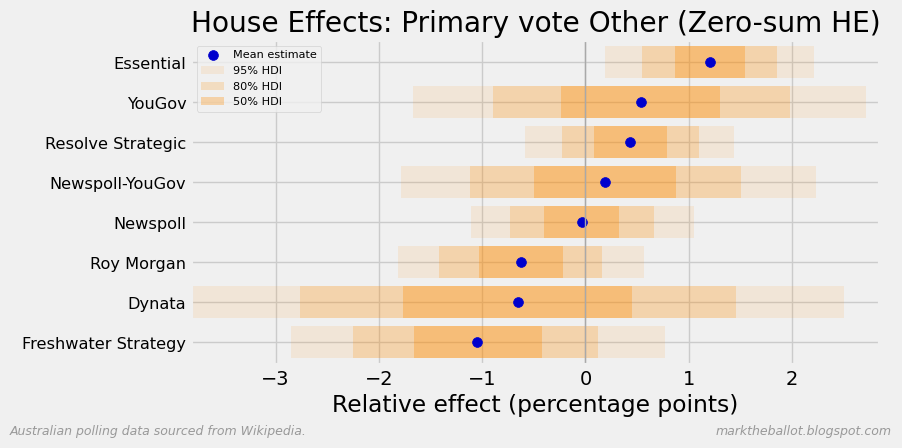

In [8]:
# do the analysis
means = {}
for approach in (LEFT_ANCHORED, ZERO_SUM):
    print(f"APPROACH: {approach}")
    n_samples = 1_000 if approach == ZERO_SUM else 2_000
    for column in chart:
        print(f"COLUMN: {column}")

        # manage anchored charts
        left_anchor = None
        if approach == LEFT_ANCHORED:
            if column not in last_election_result:
                print(f"Anchor not found for {column}-{approach}")
                continue
            left_anchor = ELECTION_DATE, last_election_result[column]

        # Construct and run the model ...
        inputs: dict[str, Any] = bayes_tools.prepare_data_for_analysis(
            df, column, left_anchor=left_anchor
        )
        model: pm.Model = bayes_tools.define_model(inputs)
        generate_model_map(model, filemame_tag=f"{column}-{approach}")
        trace = bayes_tools.draw_samples(model, tune=n_samples, draws=n_samples)

        # plot the results
        line_color = plotting.get_color(column)
        point_color = plotting.contrast(line_color)
        after_text = "VI" if approach == LEFT_ANCHORED else "HE"
        title_stem = f"{column} ({approach} {after_text})"
        means[title_stem] = bayes_tools.plot_aggregation(
            inputs,
            trace,
            line_color=line_color,
            point_color=point_color,
            title=f"Voting intention: {title_stem}",
            show=SHOW,
        )
        bayes_tools.plot_house_effects(
            inputs,
            trace,
            line_color=line_color,
            point_color=point_color,
            title=f"House Effects: {title_stem}",
            show=SHOW,
        )
        if approach == LEFT_ANCHORED:
            ax = az.plot_posterior(trace, var_names=["systemic_poll_error"])
            plotting.finalise_plot(
                ax,
                **plotting.footers,
                title=f"Systemic poll error: {title_stem}",
                xlabel="Percentage points in favour",
                ylabel="Probability density",
                show=SHOW,
            )

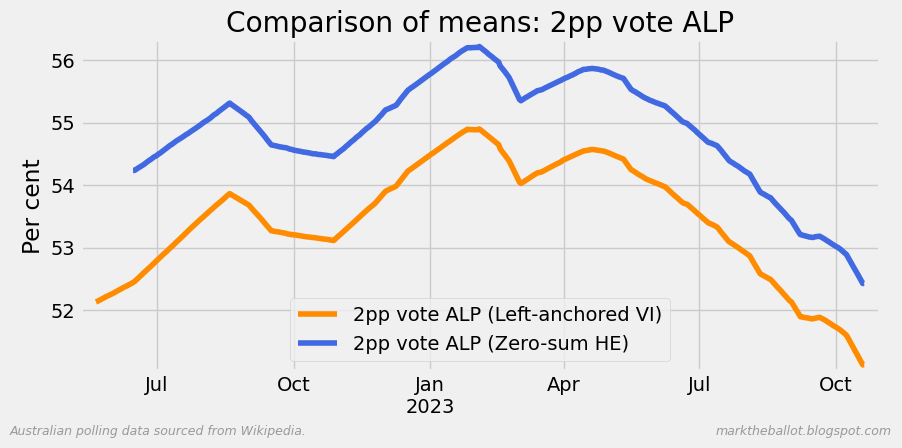

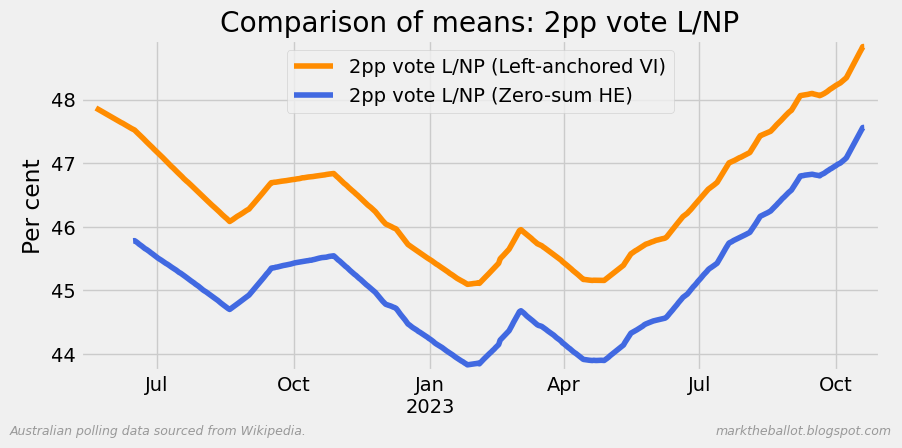

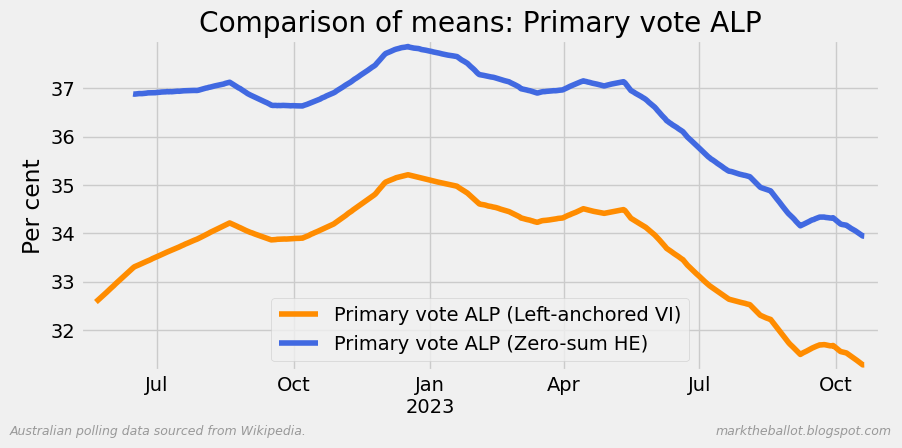

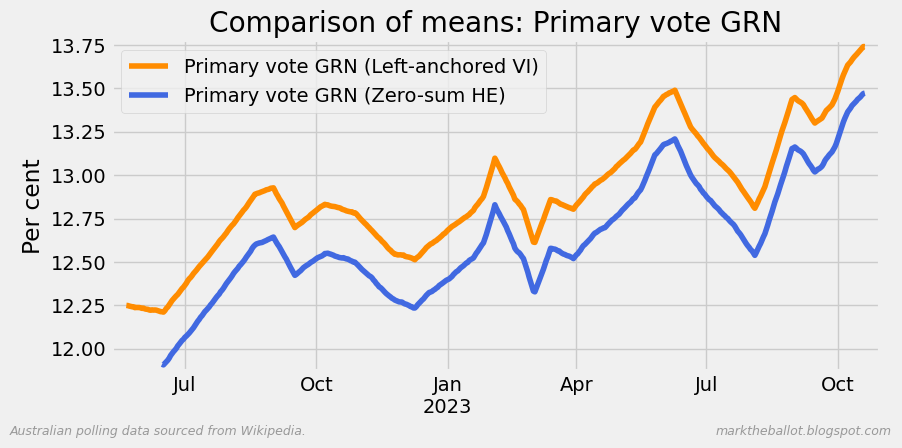

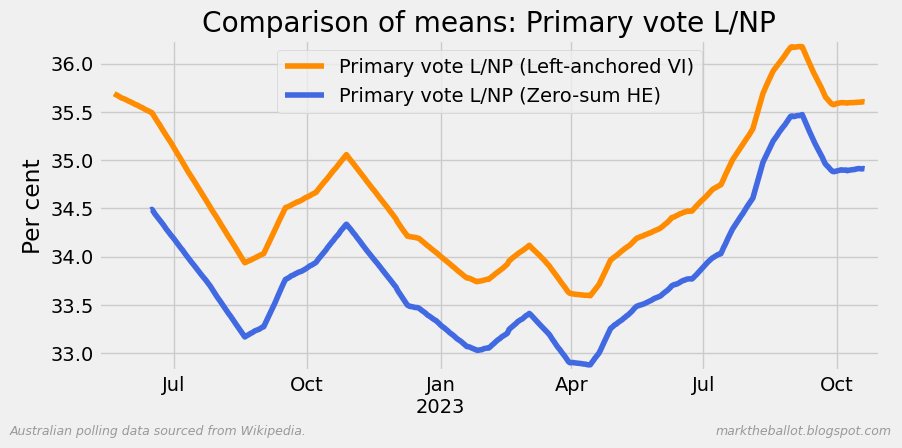

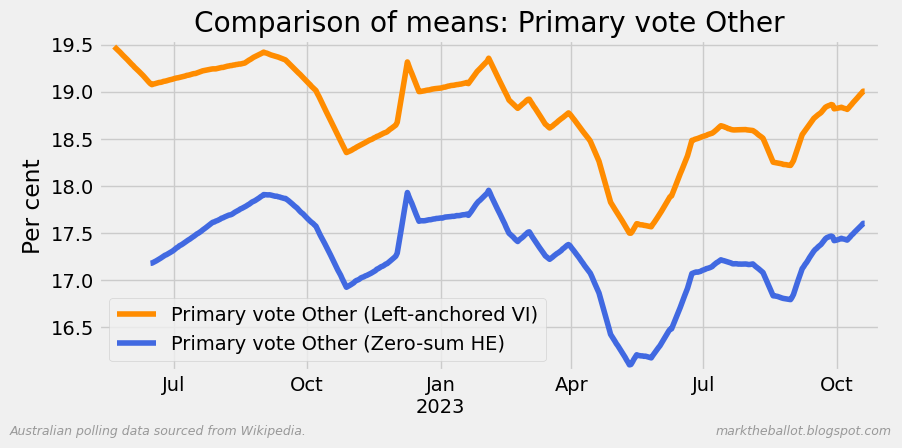

In [9]:
# compare the means ...
means_df = pd.DataFrame(means)
for to_do in chart:
    cols = [x for x in means if to_do in x]
    ax = means_df[cols].plot(color=["darkorange", "royalblue"])
    plotting.finalise_plot(
        ax,
        title=f"Comparison of means: {to_do}",
        ylabel="Per cent",
        y50=True,
        **plotting.footers,
        show=SHOW,
    )

## Finished

In [10]:
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Mon Oct 30 2023 13:32:24

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

matplotlib: 3.8.0
pymc      : 5.9.1
pandas    : 2.1.2
arviz     : 0.16.1

Watermark: 2.4.3



In [11]:
print("Finished")

Finished
